In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_labels = pd.read_csv('/content/drive/My Drive/Thinkful Data Science/LIDC/candidates_train.csv')
train_path = '/content/drive/My Drive/Thinkful Data Science/LIDC/Train/'

In [0]:
# Limit our img files to those which contain a nodule (they contain a 'pos' in their filename)

train_list = []
for i in os.listdir(train_path):
  if i.startswith('pos'):
    train_list.append(i)

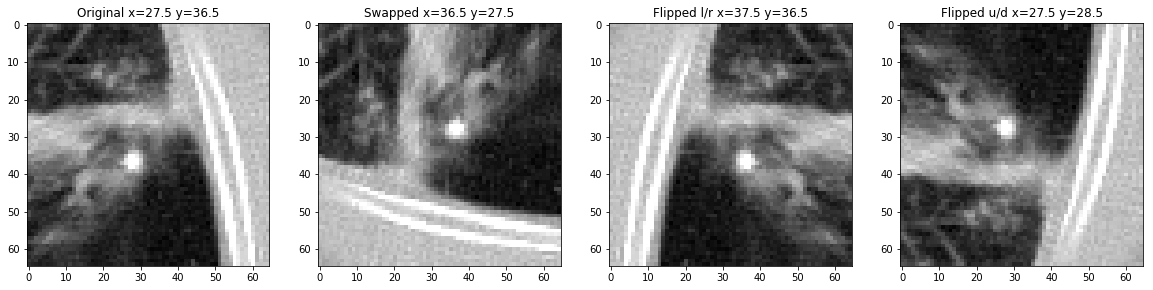

In [0]:
#Here is an example of how each image will be augmented and how the X/Y coordinates will be modified to reflect the transformation

img_loc = train_list[3]

img = mpimg.imread(f'{train_path}{img_loc}')
img_id = int(''.join([n for n in img_loc if n.isdigit()]))        

x = train_labels.loc[img_id, 'voxel_x']
y = train_labels.loc[img_id, 'voxel_y']

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.title(f'Original x={x} y={y}')
plt.imshow(img, cmap='gray')

plt.subplot(1,4,2)
plt.title(f'Swapped x={y} y={x}')
plt.imshow(np.swapaxes(img,0,1), cmap='gray')

plt.subplot(1,4,3)
plt.title(f'Flipped l/r x={65-x} y={y}')
plt.imshow(np.fliplr(img), cmap='gray')

plt.subplot(1,4,4)
plt.title(f'Flipped u/d x={x} y={65-y}')
plt.imshow(np.flipud(img), cmap='gray')

plt.show()


In [0]:
augmented_labels = pd.DataFrame()

In [0]:
# loop through each image in train_list, augment, save img, create df for flow_from_dataframe during modeling

for i in range(len(train_list)):
  x,y = 0,0
  file_path = '/content/drive/My Drive/Thinkful Data Science/LIDC/Train augmented/'
  img_loc = train_list[i]

  #img = mpimg.imread(f'{train_path}{img_loc}')
  img_id = int(''.join([n for n in img_loc if n.isdigit()]))        

  x = train_labels.loc[img_id, 'voxel_x']
  y = train_labels.loc[img_id, 'voxel_y']
  diameter = train_labels.loc[img_id, 'voxel_d2']
  
  # Save original 
  
  impath = f'img_{i}.tiff'
  
  #Image.fromarray(img).convert('L').save(f'{file_path}{impath}')
  
  augmented_labels.loc[i*4+1,'img'] = impath
  augmented_labels.loc[i*4+1,'x'] = x
  augmented_labels.loc[i*4+1,'y'] = y
  augmented_labels.loc[i*4+1,'diameter'] = diameter
  
  # Swap image
  
  #img = np.swapaxes(img,0,1)
  impath = f'swap_{i}.tiff'
  
  #Image.fromarray(img).convert('L').save(f'{file_path}{impath}')
  
  augmented_labels.loc[i*4+2,'img'] = impath
  augmented_labels.loc[i*4+2,'x'] = y
  augmented_labels.loc[i*4+2,'y'] = x
  augmented_labels.loc[i*4+2,'diameter'] = diameter
  
  # Flip horizontally
  
  #img = np.fliplr(img)
  impath = f'fliplr_{i}.tiff'
  
  #Image.fromarray(img).convert('L').save(f'{file_path}{impath}')
  
  augmented_labels.loc[i*4+3,'img'] = impath
  augmented_labels.loc[i*4+3,'x'] = 65-x
  augmented_labels.loc[i*4+3,'y'] = y
  augmented_labels.loc[i*4+3,'diameter'] = diameter
  
  # Flip vertically
  
  #img = np.flipud(img)
  impath = f'flipud_{i}.tiff'
  
  #Image.fromarray(img).convert('L').save(f'{file_path}{impath}')
  
  augmented_labels.loc[i*4+4,'img'] = impath
  augmented_labels.loc[i*4+4,'x'] = x
  augmented_labels.loc[i*4+4,'y'] = 65-y
  augmented_labels.loc[i*4+4,'diameter'] = diameter

In [0]:
augmented_labels.to_csv('/content/drive/My Drive/Thinkful Data Science/LIDC/augmented_labels.csv')

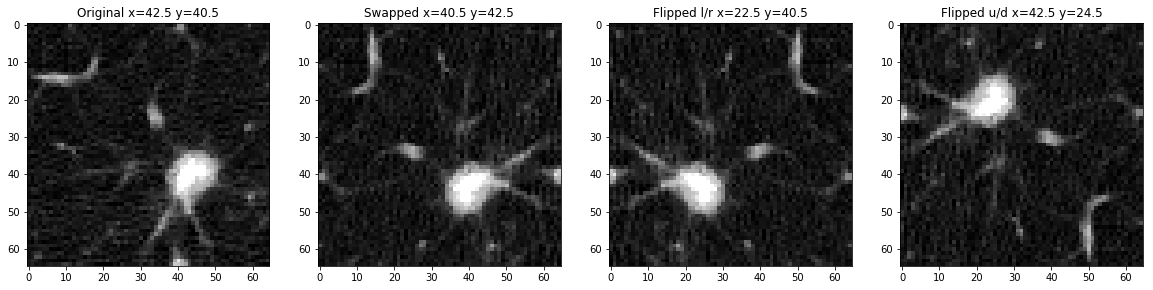

In [0]:
i = 1

img = mpimg.imread(f'{file_path}img_{i}.tiff')
swap = mpimg.imread(f'{file_path}swap_{i}.tiff')
fliplr = mpimg.imread(f'{file_path}fliplr_{i}.tiff')
flipud = mpimg.imread(f'{file_path}flipud_{i}.tiff')

x = float(augmented_labels.loc[augmented_labels.img == f'img_{i}.tiff', 'x'])
y = float(augmented_labels.loc[augmented_labels.img == f'img_{i}.tiff', 'y'])

swapx = float(augmented_labels.loc[augmented_labels.img == f'swap_{i}.tiff', 'x'])
swapy = float(augmented_labels.loc[augmented_labels.img == f'swap_{i}.tiff', 'y'])

fliplrx = float(augmented_labels.loc[augmented_labels.img == f'fliplr_{i}.tiff', 'x'])
fliplry = float(augmented_labels.loc[augmented_labels.img == f'fliplr_{i}.tiff', 'y'])

flipudx = float(augmented_labels.loc[augmented_labels.img == f'flipud_{i}.tiff', 'x'])
flipudy = float(augmented_labels.loc[augmented_labels.img == f'flipud_{i}.tiff', 'y'])


plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.title(f'Original x={x} y={y}')
plt.imshow(img, cmap='gray')

plt.subplot(1,4,2)
plt.title(f'Swapped x={swapx} y={swapy}')
plt.imshow(swap, cmap='gray')

plt.subplot(1,4,3)
plt.title(f'Flipped l/r x={fliplrx} y={fliplry}')
plt.imshow(fliplr, cmap='gray')

plt.subplot(1,4,4)
plt.title(f'Flipped u/d x={flipudx} y={flipudy}')
plt.imshow(flipud, cmap='gray')

plt.show()

In [14]:
augmented_labels

,img,x,y,diameter
1,img_0.tiff,38.5,40.5,6.041957
2,swap_0.tiff,40.5,38.5,6.041957
3,fliplr_0.tiff,26.5,40.5,6.041957
4,flipud_0.tiff,38.5,24.5,6.041957
5,img_1.tiff,42.5,40.5,17.338918
...,...,...,...,...
3396,flipud_848.tiff,39.5,40.5,24.300015
3397,img_849.tiff,23.5,31.5,25.493359
3398,swap_849.tiff,31.5,23.5,25.493359
3399,fliplr_849.tiff,41.5,31.5,25.493359
